# pyiron

## Define workflow with pyiron_base

In [1]:
import numpy as np
from pyiron_base import job
from python_workflow_definition.pyiron_base import write_workflow_json

In [2]:
from quantum_espresso_workflow import (
    calculate_qe as _calculate_qe, 
    generate_structures as _generate_structures, 
    get_bulk_structure as _get_bulk_structure, 
    plot_energy_volume_curve as _plot_energy_volume_curve,
)

In [3]:
workflow_json_filename = "pyiron_base_qe.json"

In [4]:
calculate_qe = job(_calculate_qe, output_key_lst=["energy", "volume", "structure"])
generate_structures = job(_generate_structures)
plot_energy_volume_curve = job(_plot_energy_volume_curve)
get_bulk_structure = job(_get_bulk_structure)

In [5]:
pseudopotentials = {"Al": "Al.pbe-n-kjpaw_psl.1.0.0.UPF"}

In [7]:
structure = get_bulk_structure(
    element="Al",
    a=4.04,
    cubic=True,
)

In [8]:
calc_mini = calculate_qe(
    working_directory="mini",
    input_dict={
        "structure": structure,
        "pseudopotentials": pseudopotentials,
        "kpts": (3, 3, 3),
        "calculation": "vc-relax",
        "smearing": 0.02,
    },
)

In [9]:
number_of_strains = 5
structure_lst = generate_structures(  # the generate_structures() function is not available in the workflow graph
    structure=calc_mini.output.structure,
    strain_lst=np.linspace(0.9, 1.1, number_of_strains),
    list_length=number_of_strains,
)

In [10]:
job_strain_lst = []
for i, structure_strain in enumerate(structure_lst):
    calc_strain = calculate_qe(
        working_directory="strain_" + str(i),
        input_dict={
            "structure": structure_strain,
            "pseudopotentials": pseudopotentials,
            "kpts": (3, 3, 3),
            "calculation": "scf",
            "smearing": 0.02,
        },
    )
    job_strain_lst.append(calc_strain)

In [11]:
plot = plot_energy_volume_curve(
    volume_lst=[job.output.volume for job in job_strain_lst],
    energy_lst=[job.output.energy for job in job_strain_lst],
)

In [12]:
write_workflow_json(delayed_object=plot, file_name=workflow_json_filename)

In [13]:
!cat {workflow_json_filename}

{"nodes": [{"id": 0, "function": "quantum_espresso_workflow.plot_energy_volume_curve"}, {"id": 1, "function": "python_workflow_definition.shared.get_list"}, {"id": 2, "function": "quantum_espresso_workflow.calculate_qe"}, {"id": 3, "function": "python_workflow_definition.shared.get_dict"}, {"id": 4, "function": "quantum_espresso_workflow.generate_structures"}, {"id": 5, "function": "quantum_espresso_workflow.calculate_qe"}, {"id": 6, "function": "python_workflow_definition.shared.get_dict"}, {"id": 7, "function": "quantum_espresso_workflow.get_bulk_structure"}, {"id": 8, "function": "quantum_espresso_workflow.calculate_qe"}, {"id": 9, "function": "python_workflow_definition.shared.get_dict"}, {"id": 10, "function": "quantum_espresso_workflow.calculate_qe"}, {"id": 11, "function": "python_workflow_definition.shared.get_dict"}, {"id": 12, "function": "quantum_espresso_workflow.calculate_qe"}, {"id": 13, "function": "python_workflow_definition.shared.get_dict"}, {"id": 14, "function": "qu

## Load Workflow with aiida

In [14]:
from aiida import orm, load_profile

load_profile()

Profile<uuid='5cf1546d55c84c44bae6a645cdcd021e' name='pwd'>

In [15]:
from python_workflow_definition.aiida import load_workflow_json

In [16]:
wg = load_workflow_json(file_name=workflow_json_filename)

In [17]:
wg.nodes.get_bulk_structure8.inputs.a.value = orm.Float(4.05)

04/13/2025 02:52:30 PM <2189> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [370|WorkGraphEngine|continue_workgraph]: tasks ready to run: get_bulk_structure8
04/13/2025 02:52:30 PM <2189> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [370|WorkGraphEngine|update_task_state]: Task: get_bulk_structure8, type: PyFunction, finished.
04/13/2025 02:52:30 PM <2189> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [370|WorkGraphEngine|continue_workgraph]: tasks ready to run: get_dict7
04/13/2025 02:52:31 PM <2189> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [370|WorkGraphEngine|update_task_state]: Task: get_dict7, type: PyFunction, finished.
04/13/2025 02:52:31 PM <2189> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [370|WorkGraphEngine|continue_workgraph]: tasks ready to run: calculate_qe6
[jupyter-pyiron-dev-pyth-flow-definition-32jomliz:02278] mca_base_component_repository_open: unable to 

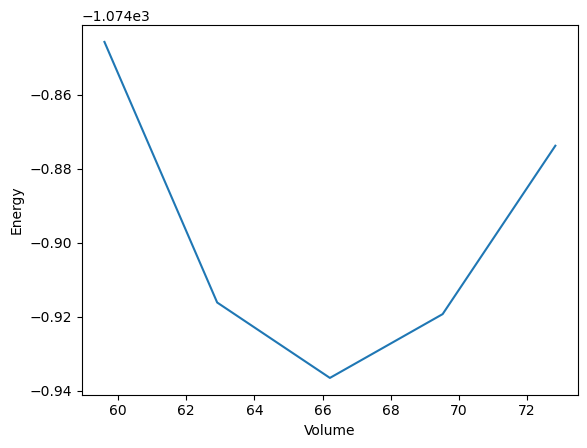

In [18]:
wg.run()

## Load Workflow with jobflow

In [19]:
from python_workflow_definition.jobflow import load_workflow_json

/srv/conda/envs/notebook/lib/python3.12/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "cipher": algorithms.TripleDES,
/srv/conda/envs/notebook/lib/python3.12/site-packages/paramiko/transport.py:253: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "class": algorithms.TripleDES,


In [20]:
from jobflow.managers.local import run_locally

In [21]:
flow = load_workflow_json(file_name=workflow_json_filename)

In [22]:
flow[0].function_kwargs["a"] = 4.05

2025-04-13 14:54:43,509 INFO Started executing jobs locally
2025-04-13 14:54:43,853 INFO Starting job - get_bulk_structure (b539c72a-4b30-49b3-ad0e-3f98e417ccbd)
2025-04-13 14:54:43,856 INFO Finished job - get_bulk_structure (b539c72a-4b30-49b3-ad0e-3f98e417ccbd)
2025-04-13 14:54:43,857 INFO Starting job - get_dict (d5e5eb38-56a0-41ce-90f4-731ddb0ebe83)
2025-04-13 14:54:43,859 INFO Finished job - get_dict (d5e5eb38-56a0-41ce-90f4-731ddb0ebe83)
2025-04-13 14:54:43,860 INFO Starting job - calculate_qe (f06c0cc5-9dbf-4eda-a091-bf4d7e11f64a)


[jupyter-pyiron-dev-pyth-flow-definition-32jomliz:02349] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)


2025-04-13 14:55:34,991 INFO Finished job - calculate_qe (f06c0cc5-9dbf-4eda-a091-bf4d7e11f64a)
2025-04-13 14:55:34,992 INFO Starting job - generate_structures (0dafc996-0db5-416c-b1a5-a2a0c683cffb)
2025-04-13 14:55:34,998 INFO Finished job - generate_structures (0dafc996-0db5-416c-b1a5-a2a0c683cffb)
2025-04-13 14:55:34,999 INFO Starting job - get_dict (572d64fe-7c4f-4ee8-a7c9-9091a724e80a)
2025-04-13 14:55:35,000 INFO Finished job - get_dict (572d64fe-7c4f-4ee8-a7c9-9091a724e80a)
2025-04-13 14:55:35,001 INFO Starting job - get_dict (95a99bf5-bbbb-4895-98d2-3a0ed81297b0)
2025-04-13 14:55:35,003 INFO Finished job - get_dict (95a99bf5-bbbb-4895-98d2-3a0ed81297b0)
2025-04-13 14:55:35,004 INFO Starting job - get_dict (e7865d4c-2b74-40ca-9aee-84f40ec1a8de)
2025-04-13 14:55:35,005 INFO Finished job - get_dict (e7865d4c-2b74-40ca-9aee-84f40ec1a8de)
2025-04-13 14:55:35,006 INFO Starting job - get_dict (90c676c5-ae8d-43c1-be2b-4f9e97f6042f)
2025-04-13 14:55:35,008 INFO Finished job - get_dict (

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG
[jupyter-pyiron-dev-pyth-flow-definition-32jomliz:02372] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)


2025-04-13 14:55:45,865 INFO Finished job - calculate_qe (3c6a5746-2d26-49b2-a232-06d7329860e3)
2025-04-13 14:55:45,866 INFO Starting job - calculate_qe (4a4d8ad4-8a06-4c5a-98f7-c337e893b82b)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG
[jupyter-pyiron-dev-pyth-flow-definition-32jomliz:02382] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)


2025-04-13 14:55:57,687 INFO Finished job - calculate_qe (4a4d8ad4-8a06-4c5a-98f7-c337e893b82b)
2025-04-13 14:55:57,688 INFO Starting job - calculate_qe (95eb9064-db31-4fda-82dc-ec452c848a3d)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG
[jupyter-pyiron-dev-pyth-flow-definition-32jomliz:02392] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)


2025-04-13 14:56:12,320 INFO Finished job - calculate_qe (95eb9064-db31-4fda-82dc-ec452c848a3d)
2025-04-13 14:56:12,320 INFO Starting job - calculate_qe (d924dc91-3c5c-4d6a-a95f-f24293834429)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG
[jupyter-pyiron-dev-pyth-flow-definition-32jomliz:02403] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)


2025-04-13 14:56:27,407 INFO Finished job - calculate_qe (d924dc91-3c5c-4d6a-a95f-f24293834429)
2025-04-13 14:56:27,408 INFO Starting job - calculate_qe (d444f3e6-e883-4acb-82be-d5663a44fc5a)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG
[jupyter-pyiron-dev-pyth-flow-definition-32jomliz:02414] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)


2025-04-13 14:56:38,305 INFO Finished job - calculate_qe (d444f3e6-e883-4acb-82be-d5663a44fc5a)
2025-04-13 14:56:38,306 INFO Starting job - get_list (9aac61bc-87dc-4d58-94d7-37b5523a8275)
2025-04-13 14:56:38,309 INFO Finished job - get_list (9aac61bc-87dc-4d58-94d7-37b5523a8275)
2025-04-13 14:56:38,309 INFO Starting job - get_list (165bee7d-2eb6-4389-b463-75546b773365)
2025-04-13 14:56:38,312 INFO Finished job - get_list (165bee7d-2eb6-4389-b463-75546b773365)
2025-04-13 14:56:38,313 INFO Starting job - plot_energy_volume_curve (f0555e9f-815f-489a-9a8e-d0a2f413778c)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG


2025-04-13 14:56:38,367 INFO Finished job - plot_energy_volume_curve (f0555e9f-815f-489a-9a8e-d0a2f413778c)
2025-04-13 14:56:38,368 INFO Finished executing jobs locally


{'b539c72a-4b30-49b3-ad0e-3f98e417ccbd': {1: Response(output='{"immutable_id": null, "last_modified": null, "elements": ["Al"], "nelements": 1, "elements_ratios": [1.0], "chemical_formula_descriptive": "Al4", "chemical_formula_reduced": "Al", "chemical_formula_hill": null, "chemical_formula_anonymous": "A", "dimension_types": [1, 1, 1], "nperiodic_dimensions": 3, "lattice_vectors": [[4.05, 0.0, 0.0], [0.0, 4.05, 0.0], [0.0, 0.0, 4.05]], "space_group_symmetry_operations_xyz": null, "space_group_symbol_hall": null, "space_group_symbol_hermann_mauguin": null, "space_group_symbol_hermann_mauguin_extended": null, "space_group_it_number": null, "cartesian_site_positions": [[0.0, 0.0, 0.0], [0.0, 2.025, 2.025], [2.025, 0.0, 2.025], [2.025, 2.025, 0.0]], "nsites": 4, "species": [{"name": "Al", "chemical_symbols": ["Al"], "concentration": [1.0], "mass": null, "original_name": null, "attached": null, "nattached": null}], "species_at_sites": ["Al", "Al", "Al", "Al"], "assemblies": null, "structur

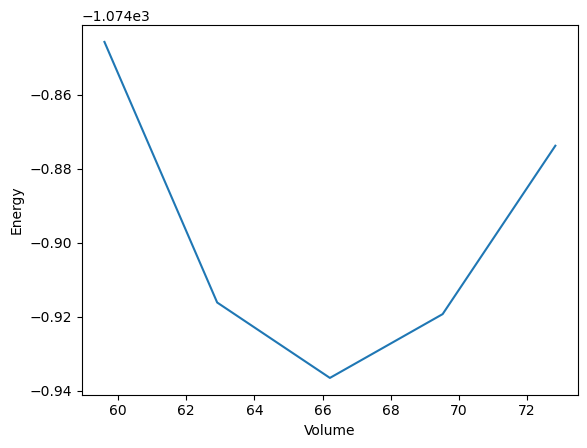

In [23]:
result = run_locally(flow)
result